<a href="https://colab.research.google.com/github/hechen2020/19ma573HuixinChen/blob/master/src/hw_ftcs_stability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Our heat equation is

$$u_t = u_{xx}, t\geq0; x\in\mathbb{R}$$

with initial condition

$$u(x,0)=\phi(x), x\in\mathbb{R}$$

In the above, $\phi$ is a given function and $u$ is unknown function we seek for. For instance, let's say $\phi$ is a continuous function given by

$$\phi(x)=cos(\pi x)I_{(-1/2, +1/2)}(x)$$

**todo**

- plot the function $\phi$
- perform FTCS with grid $(\Delta x = .5, \Delta t = .25)$ for $n=0,1,2,3$.
- prove FTCS is instable, i.e. show that

$$max_j|u_j^n|\rightarrow\infty, n\rightarrow\infty$$

- show that if $\Delta t <1/8$, then FTCS is stable, i.e.

$$max_{j,n}|u_j^n|<\infty$$

In [0]:
import numpy as np
import matplotlib.pyplot as plt

**plot $\phi$**

In [0]:
def phi(x):
  return np.cos(np.pi * x) * (x>-1/2) * (x<1/2)

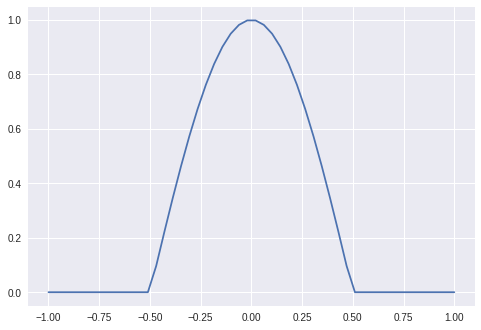

In [14]:
x = np.linspace(-1,1)
plt.plot(x,phi(x))
plt.show()

In [0]:
def ftcs(a,b,nt,dx,dt):
  nx = int((b-a)/dx)
  rho = dt/(dx**2)#assume alpha = 1
  u = np.zeros((nt,nx))
  
  for x in range(0,nx):
    u[0][x] = phi(a+x*dx)
    
  for t in range(0,nt-1):
    for x in range(1,nx-1):
      u[t+1][x] = rho*(u[t][x-1]) + (1-2*rho)*(u[t][x]) + rho*(u[t][x+1])
      
      
  return u

In [16]:
u = ftcs(-2,2.5,4,.5,.25)
print(u)

[[ 0. -0. -0.  0.  1.  0. -0. -0.  0.]
 [ 0.  0.  0.  1. -1.  1.  0.  0.  0.]
 [ 0.  0.  1. -2.  3. -2.  1.  0.  0.]
 [ 0.  1. -3.  6. -7.  6. -3.  1.  0.]]


**prove FTCS instable**

*still unsure*

given $\Delta x = 0.5$, $\Delta t = 0.25$, we have

$$\rho = \frac{0.25}{0.5^2} = 1$$

so our weights for $u_{j-1}^n$,  $u_{j}^n$, and  $u_{j+1}^n$ to calculate $u_j^{n+1}$ are $1$, $-1$, and $1$ respectively.

with the initial condition $\phi (x) = cos(\pi x)I_{(-1/2,1/2)}(x)$, we get for the first row at $t=0$:

$$(... \quad 0 \quad 0 \quad ... \quad 0 \quad 1 \quad 0 \quad ... \quad 0 \quad 0 \quad ..)$$

where the maximum entry is at $x=0$ and $u_0^0=1$

we know from the formula

$$u_j^{n+1}=u_{j-1}^n-u_j^n+u_{j+1}^n$$

that the second row will consist of entries $1$, $-1$ and $1$ around the center, i.e., we get for the second row

$$(... \quad 0 \quad ... \quad 0 \quad 1 \quad -1 \quad 1 \quad 0 \quad ... \quad 0 \quad ...)$$

where the positive values are next to the negative value, and the center becomes negative.

we can see from the weights, that the entry for same 0-th position one row up is always going to be the opposite sign, i.e.,

$$sgn(u_0^{n+1}) = -sgn(u_0^n)$$

and because the first non-zero value started at $x=0$ position, for each row the maximum absolute value is at the center, i.e.,

$$max_j|u_j^n| = |u_0^n|,\quad \forall n$$

using row two entries, we get for row three

$$(... \quad 0 \quad 0 \quad 1 \quad -2 \quad 3 \quad -2 \quad 1 \quad 0 \quad 0 \quad ...)$$

where we observe the magnitude of the center is increasing at an increasing rate, since the neighboring entries are also increasing in magnitude. And due the the opposite sign of neighboring elements and corresponding weights, the magnitude will keep increasing, and thus

$$max_j|u_j^n|\rightarrow\infty, \quad as \quad n\rightarrow\infty$$


**show if $\Delta t < 1/8$, then FTCS is stable**

In [17]:
v = ftcs(-2,2.5,5,.5,.125)
print(v)

[[ 0.    -0.    -0.     0.     1.     0.    -0.    -0.     0.   ]
 [ 0.     0.     0.     0.5    0.     0.5    0.     0.     0.   ]
 [ 0.     0.     0.25   0.     0.5    0.     0.25   0.     0.   ]
 [ 0.     0.125  0.     0.375  0.     0.375  0.     0.125  0.   ]
 [ 0.     0.     0.25   0.     0.375  0.     0.25   0.     0.   ]]


visually using $\rho$ instead of numbers:

\begin{bmatrix}
    ... & 0 & s^2 & 2s(1-2s) & 2s^2+(1-2s)^2 & 2s(1-2s) & s^2 & 0 & ... \\
    ... & ... & 0 & s & 1-2s & s & 0 & ... & ... \\
    ...&... & ... & 0 & 1 & 0 & ... & ... & ...
  \end{bmatrix}

when $\Delta t < 1/8$, from the formula

$$\rho = \frac{\alpha\Delta t}{\Delta x ^2}$$

with $\Delta x = 0.5$ and $\alpha = 1$,

$$\rho < 1/2$$

thus our weights are restricted as

$$0<\rho < 1/2$$

$$0< 1-2\rho< 1$$

$$0<\rho <1/2$$

for the consecutive entries. We start with our o-th row

$$(... 0 0 ... 0 1 0 ... 0 0 ...)$$

where all entries are non-negative

and since the weights are all positive that sum to 1, the entries of n-th row should be all positive (or 0):

$$u_j^n = \rho u_{j-1}^{n-1} + (1-2\rho) u_j^{n-1} + \rho u_{j+1}^{n-1} \geq 0$$

and as the sum of the weights add up to 1, the sum of all entries of n-th row add up to the sum of entries of row (n-1)-th, which is equal to the sum of row 1:

$$\sum_{all j} u_j^n = \sum_{all j} u_j^{n-1} = ... = \sum_{all j} u_j^0 = 1$$

so

$$max_j|u_j^n|\leq 1$$

and the method is stable